<a href="https://colab.research.google.com/github/Theodin28/QBUS6840/blob/master/QBUS_Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QBUS6840 ASSIGNMENT 1**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
m_sqrt_error = mean_squared_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

from tqdm import tqdm_notebook

from itertools import product
%matplotlib inline
data = pd.read_csv('UnemploymentRateJan1986-Dec2018.csv')

In [0]:
data.head()

,Unemployment_Rates
Months,
Jan-86,8.53
Feb-86,8.92
Mar-86,8.48
Apr-86,8.06
May-86,7.71


In [0]:
data.describe()

,Unemployment_Rates
count,396.000000
mean,6.726212
std,1.811832
min,3.930000
25%,5.410000
50%,6.210000
75%,7.947500
max,11.990000


In [0]:
data.isnull().count()

Unemployment_Rates    396
dtype: int64

In [0]:

data['Months']=pd.to_datetime(data['Months'],format='%b-%y')
data.set_index('Months', inplace=True)
ts = data['Unemployment_Rates']

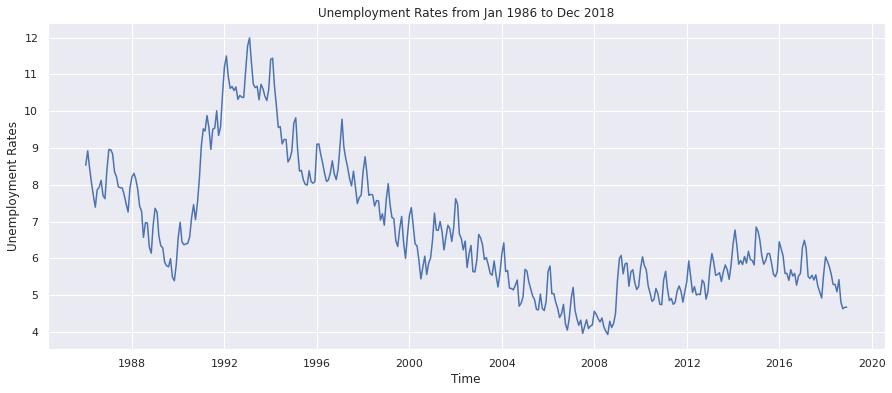

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.figure()
plt.plot(ts)
plt.title('Unemployment Rates from Jan 1986 to Dec 2018')
plt.xlabel('Time')
plt.ylabel('Unemployment Rates');

<Figure size 1080x432 with 0 Axes>

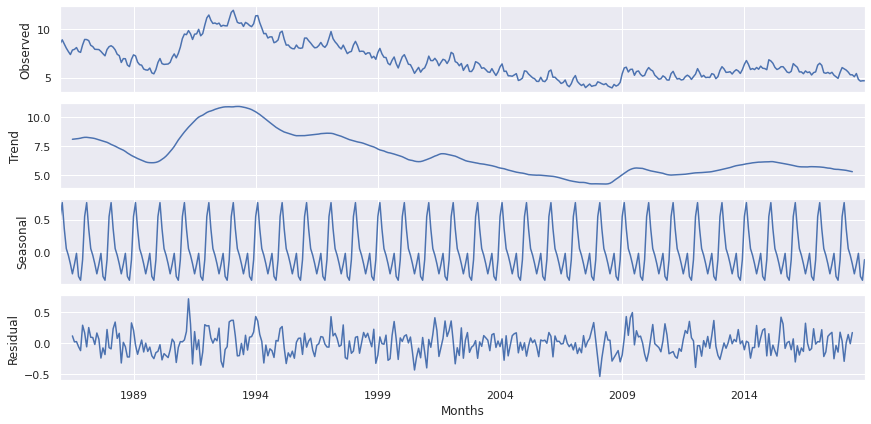

In [5]:
decomposition = seasonal_decompose(ts, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6);

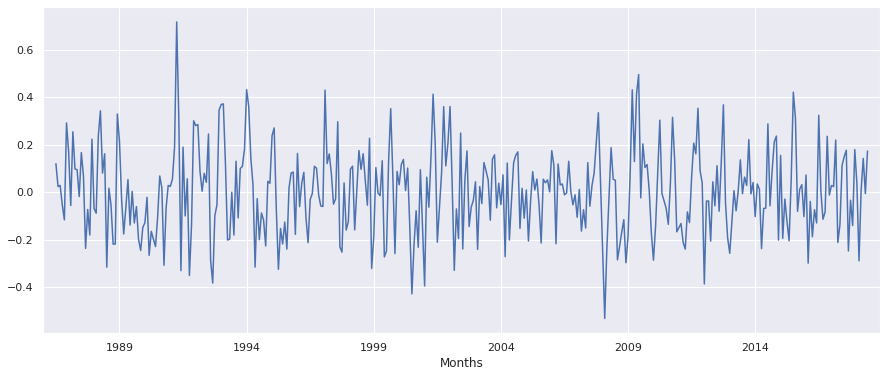

In [6]:
resid = decomposition.resid
resid.plot()

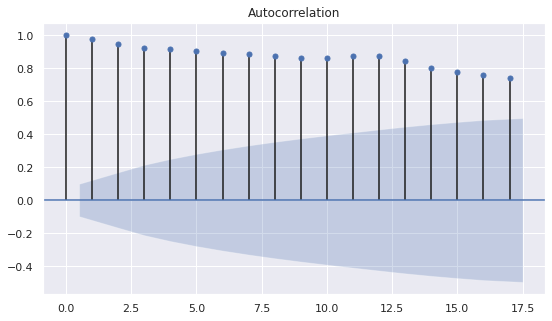

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(9,5))
plot_acf(ts, lags=17, ax = ax)
plt.show()

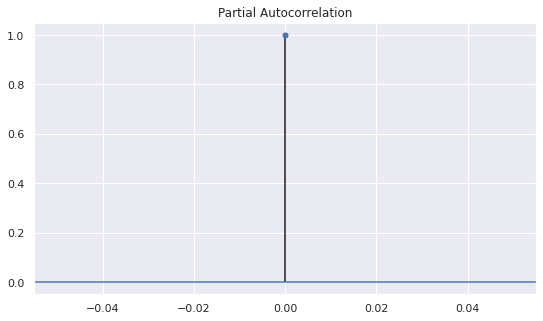

In [8]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid, lags=30, ax=ax)
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determining rolling statistics:
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window = 12).mean()
    
    rolstd = timeseries.rolling(window = 12).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing the Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

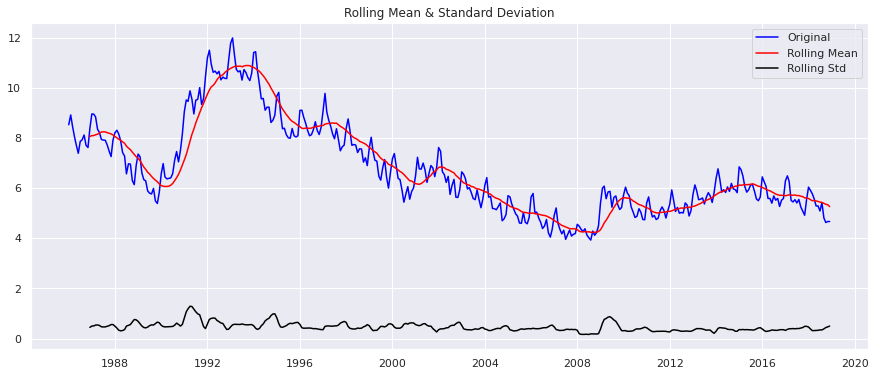

Results of Dickey-Fuller Test:
Test Statistic                  -1.862546
p-value                          0.349880
#Lags Used                      17.000000
Number of Observations Used    378.000000
Critical Value (1%)             -3.447769
Critical Value (5%)             -2.869217
Critical Value (10%)            -2.570860
dtype: float64


In [10]:
test_stationarity(ts)